<img align="left" src="img/ECE364-logo.png" width="300px" style="padding:30px;border:thin solid white;"> 

# Lecture 6 - Primal optimization
## ECE364 - Programming Methods for Machine Learning
### Nickvash Kani 












###### Slides based off prior lectures by Alex Schwing, Aigou Han, Farzas Kamalabadi, Corey Snyder. All mistakes are my own!

In this lecture we will cover: 

- Basics of optimization
- Convexity
- Steepest descent
- Gradient momentum


## Whats's primal optimization? 

**1. Primal Optimization Problem**
- The **primal problem** is the original optimization problem we want to solve.
- Typically, it is formulated as a **minimization** or **maximization** problem with constraints.
- It involves decision variables, an objective function, and constraints.

**Example of a Primal Problem (Convex Optimization Form)**
$$
\min_{x} \quad f(x)
$$
$$
\text{subject to } g_i(x) \leq 0, \quad i = 1, ..., m
$$
$$
h_j(x) = 0, \quad j = 1, ..., p
$$
where:
- \( f(x) \) is the objective function.
- \( g_i(x) \) are inequality constraints.
- \( h_j(x) \) are equality constraints.
- \( x \) are the primal decision variables.

**2. Dual Optimization Problem**
- The **dual problem** is derived from the primal problem using Lagrange multipliers.
- Instead of optimizing over the original decision variables $x$, it optimizes over the Lagrange multipliers.
- The dual problem provides a **lower bound** (in minimization problems) or an **upper bound** (in maximization problems) to the primal solution.
- **Strong duality** holds under certain conditions (e.g., Slater’s condition in convex problems), meaning the primal and dual solutions are equal.

### **Forming the Dual Problem**
We construct the **Lagrangian function**:
$$
L(x, \lambda, \nu) = f(x) + \sum_{i=1}^{m} \lambda_i g_i(x) + \sum_{j=1}^{p} \nu_j h_j(x)
$$
where:
- $\lambda_i \geq 0$ are **dual variables (Lagrange multipliers)** for inequality constraints.
- $\nu_j$ are **dual variables** for equality constraints.

The **dual function** is:
$$
\theta(\lambda, \nu) = \inf_x L(x, \lambda, \nu)
$$
Then, the **dual optimization problem** is:
$$
\max_{\lambda \geq 0, \nu} \theta(\lambda, \nu)
$$

**We don't need to know about dual optimization in this course**

### Returning back to our optimization problem

The problem more generally: 
$$
\min_{x} \quad f(x)
$$
$$
\text{subject to } g_i(x) \leq 0, \quad i = 1, ..., m
$$

**Solution:**
Solution $x^*$ has smallest value $f_0(w^*)$ amon gall the values that satisfythe constraints.

<img align="center" src="img/minima.png" width="600px" style="padding:30px;border:thin solid white;"> 


Questions: 

- When can we find the optima? 
- What algorithms are there to find the optima? 
- How long does it take to find the optima?

## Convexity

**Understanding the Convexity Inequality**

A **convex function** is a function where the line segment between any two points on its graph lies **above or on the graph** of the function. This property ensures that the function does not have "dips" or "valleys" beyond what is expected from a convex shape.


<img align="center" src="img/convex.png" width="500px" style="padding:30px;border:thin solid white;"> 








**Mathematical Definition**

A function $ f: \mathbb{R}^n \to \mathbb{R} $ is **convex** if, for all points $ x, y \in \mathbb{R}^n $ and for all $ \lambda \in [0,1] $, the following inequality holds:

$$
f(\lambda x + (1-\lambda) y) \leq \lambda f(x) + (1-\lambda) f(y)
$$

This condition means that for any two points $ x $ and $ y $, the function evaluated at any convex combination of these points is **less than or equal to** the corresponding convex combination of function values.

**Examples of Convex Functions**

- **Exponential**: $ \exp(a x) $ is convex on $ x \in \mathbb{R} $ for all $ a \in \mathbb{R} $.
- **Negative Logarithm**: $ -\log(x) $ is convex on $ x \in \mathbb{R}_{++} $.
- **Negative Entropy**: $ -H(x) = x \log(x) $ is convex on $ x \in \mathbb{R}_{++} $.
- **Norms**: $ \| w \|_p $ for $ p \geq 1 $.
- **Log-Sum-Exp**: $ \log(\exp(w_1) + \dots + \exp(w_d)) $.


**Operations Which Preserve Convexity**

- **Non-negative weighted sums**: $ \alpha_i \geq 0 $; if $ f_i $ are convex for all $ i $, then so is:

  $$
  g = \alpha_1 f_1 + \alpha_2 f_2 + \dots
  $$

- **Composition with an affine mapping**: If $ f $ is convex, then so is:

  $$
  g(\mathbf{w}) = f(A\mathbf{w} + b)
  $$

- **Pointwise maximum**: If $ f_1, f_2 $ are convex, then so is:

  $$
  g(\mathbf{w}) = \max \{ f_1(\mathbf{w}), f_2(\mathbf{w}) \}
  $$


**Why is convexity important?**

- **1. Global Optimality Guarantee** If a function **is convex**, any **local minimum is also a global minimum**. This is a crucial property because, in general, non-convex functions may have multiple local minima, making it difficult to find the best solution. Formally, for a convex function $ f(x) $, if $ x^* $ satisfies:

  $$
  \nabla f(x^*) = 0
  $$

  then $ x^* $ is a **global minimum**.



- **Efficient Algorithms for Convex Problems** Convex optimization problems can often be solved **efficiently** using well-established algorithms, including:
    - **Gradient Descent** (for smooth convex functions)
    - **Newton’s Method** (for strongly convex functions)
    - **Interior-Point Methods** (for constrained convex optimization)
    - **Simplex and Interior-Point Methods** (for convex Linear Programming problems)

    These algorithms are guaranteed to converge to the global minimum under appropriate conditions.



## How do we find the minima? 

**Iterative Algorithm**

- **Start with some guess** $ \mathbf{w} $
- **Iterate** $ k = 1, 2, 3, \dots $
  - Select direction $ d_k $ and step size $ \alpha_k $
  - Update:  
    $$
    \mathbf{w} \gets \mathbf{w} + \alpha_k d_k
    $$
  - Check whether we should stop (e.g., if $ \nabla f(\mathbf{w}) \approx 0 $)

---

**Descent Direction**

The descent direction $ d_k $ satisfies:

$$
\nabla f(\mathbf{w})^\top d_k < 0
$$


**How to select direction $d_k$**

- Steepest Descent: $d_k = \nabla f(w_k)$ 

<img align="center" src="img/descent.png" width="400px" style="padding:30px;border:thin solid white;"> 



Other directions also used: 

- **Scaled gradient** $d_k = -D_k \nabla f(w_k) where $D_k$ is a scalign matrix (also called preconditioner)
- etc. 

**How to Select Stepsize**

- **Exact**:  
  $$ \alpha_k = \arg \min_{\alpha \geq 0} f(\mathbf{w}_k + \alpha d_k) $$

- **Constant**:  
  $$ \alpha_k = \mathbb{R} $$


**Steepest descent + constant step size is gradient descent!**

So what's the problem? Can we call the lecture over? [Interactive web tool](https://fa.bianp.net/teaching/2018/COMP-652/gradient_descent.html)

**How to Select Stepsize (continued)**

**Optimal line search** At every iteration \( k \), **optimal line search** computes the step size \( \varepsilon_k \) as follows:

$$
\varepsilon_k = \arg \min_{\varepsilon \geq 0} f(\mathbf{x}_k + \varepsilon d_k). \tag{3.3}
$$

Clearly, the above problem presumes a chosen **direction of motion** $ d_k $. The method searches for the value of $ \varepsilon_k $ over the half-line $ [0, \infty) $, therefore it is called **optimal line search**. 

By this description, it is clear that **optimal line search** corresponds to a sequence of **optimal local decisions**, yielding maximum reduction of $ f $ at every iteration $ k $, given that the current state or position is $ \mathbf{x}_k $ and the descent direction has been chosen to be $ d_k $.

Solving for $ \varepsilon $ at every iteration of the **gradient or steepest descent algorithms** may be **difficult and costly**.

This motivates the **Armijo rule**. [1]

**Armijo’s Rule in Machine Learning**
**Armijo’s rule** is a step size selection method used in **gradient-based optimization** to ensure sufficient **decrease in the objective function** while maintaining stability. It is widely used in **line search methods** for optimization, particularly in **gradient descent, Newton’s method, and quasi-Newton methods**.

---

**Armijo’s Rule for Step Size Selection**
Armijo’s rule uses a **backtracking approach** to find a suitable step size $ \alpha $:

1. **Start** with an initial step size $ \alpha = s $.
2. **Check** if the Armijo condition holds:

   $$
   f(\mathbf{w}_k + \alpha d_k) - f(\mathbf{w}_k) \leq \sigma \alpha \nabla f(\mathbf{w}_k)^T d_k
   $$

3. If the condition **does not hold**, reduce $ \alpha $ using a decay factor $ \beta $:

   $$
   \alpha = \beta \alpha, \quad \text{(e.g., with } \beta = 0.5)
   $$

4. **Repeat** until a suitable $ \alpha $ is found.





**Armijo’s Condition**
The **Armijo condition** ensures that the function value decreases sufficiently after taking a step in the descent direction. Given an objective function $ f(\mathbf{w}) $, the step size $ \alpha $ must satisfy:

$$
f(\mathbf{w}_k + \alpha d_k) - f(\mathbf{w}_k) \leq \sigma \alpha \nabla f(\mathbf{w}_k)^T d_k
$$

where:
- $ \mathbf{w}_k $ is the current iterate.
- $ d_k $ is the descent direction (e.g., $ d_k = -\nabla f(\mathbf{w}_k) $ in gradient descent).
- $ \alpha $ is the step size.
- $ \sigma \in (0,1) $ is a parameter that controls how much decrease is required (typically, $ \sigma \approx 0.1 $).

This condition ensures that:

- **Ensures sufficient decrease**: The left-hand side, $ f(\mathbf{w}_k + \alpha d_k) - f(\mathbf{w}_k) $, represents the actual change in the function value after taking a step.
- **Bounds the decrease**: The right-hand side, $ \sigma \alpha \nabla f(\mathbf{w}_k)^T d_k $, represents a fraction of the expected decrease based on the **first-order Taylor approximation**:

  $$
  f(\mathbf{w}_k + \alpha d_k) \approx f(\mathbf{w}_k) + \alpha \nabla f(\mathbf{w}_k)^T d_k
  $$

  The condition ensures that the actual decrease is **at least a fraction \( \sigma \) of the predicted decrease**.

Using a smart step size helps stabalize gradient descent (and make things faster too!) [Interactive web tool](https://fa.bianp.net/teaching/2018/COMP-652/gradient_descent.html)


## Momentum in gradient descent


One problem with gradient descent is that it has no memory. 
- If the gradient is pointing left, it'll go left. 
- Next iteration if the gradient is pointing right, it goes right. 
- This issue is especially bad for cases where the gradients are uneven among dimensions:  

<img align="center" src="img/gradient_descent_principle_component.png" width="600px" style="padding:30px;border:thin solid white;"> 

The ratio between the length of the longest and shortest principle axes of this ellipse is known as the condition number: 

$$\kappa = \left(\frac{a}{b}\right)^2$$

In order to get within $\epsilon$ of a minima, we need $\geq \kappa \log\left(\frac{1}{\epsilon}\right)$ iterations [Gradient Descent Condition Number Dependence](https://en.wikipedia.org/wiki/Condition_number)

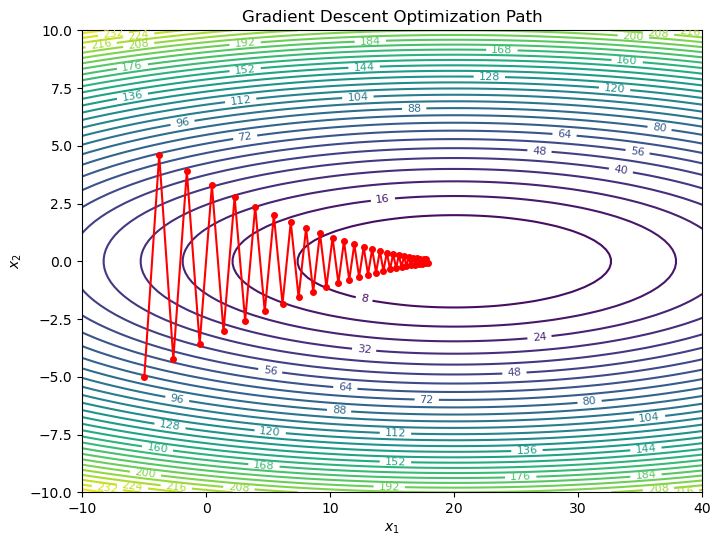

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function f(x1, x2) = (x1 - 20)^2 / 20 + 2 * x2^2
def loss_function(x):
    return (x[0] - 20) ** 2 / 20 + 2 * x[1] ** 2

# Gradient of the loss function
def compute_gradient(x):
    grad_x1 = 2 * (x[0] - 20) / 20
    grad_x2 = 2 * 2 * x[1]
    return torch.tensor([grad_x1, grad_x2])

# Optimization settings
learning_rate = 0.48
iterations = 50

# Initial point
x_gd = torch.tensor([-5.0, -5.0])

# Store trajectory for plotting
gd_trajectory = [x_gd.numpy()]

# Perform optimization
for _ in range(iterations):
    grad_gd = compute_gradient(x_gd)
    x_gd = x_gd - learning_rate * grad_gd
    gd_trajectory.append(x_gd.numpy())

# Convert trajectory to NumPy for plotting
gd_trajectory = np.array(gd_trajectory)

# Create meshgrid for contour plot
x1_vals = np.linspace(-10, 40, 100)
x2_vals = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = loss_function([X1, X2])

# Create figure and contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contour(X1, X2, Z, levels=30, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)

# Plot Gradient Descent trajectory
ax.plot(gd_trajectory[:, 0], gd_trajectory[:, 1], 'r-o', markersize=4, label="Gradient Descent")

# Labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Gradient Descent Optimization Path')
#ax.legend()

# Save the plot as an image file
image_filename = "./img/gradient_descent.png"
plt.savefig(image_filename, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



**Gradient Descent with Momentum** is an optimization algorithm that improves standard **gradient descent** by **accelerating convergence** and **reducing oscillations**, especially in highly curved loss landscapes.

---

**Update Rule for Gradient Descent with Momentum**
In standard gradient descent, the update rule is:

$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \alpha \nabla f(\mathbf{w}_k)
$$

In **gradient descent with momentum**, we introduce a **velocity term** \( v_k \):

1. **Compute the velocity (momentum update)**:
   $$
   v_{k+1} = \beta v_k - \alpha \nabla f(\mathbf{w}_k)
   $$

2. **Update weights using velocity**:
   $$
   \mathbf{w}_{k+1} = \mathbf{w}_k + v_{k+1}
   $$

where:
- \( \alpha \) is the **learning rate**.
- \( \beta \in [0,1] \) is the **momentum coefficient**, typically **0.9**.
- \( v_k \) is the **velocity term** (tracks accumulated gradients).

---

**Intuition Behind Momentum**
- Think of **momentum as a ball rolling down a hill**: it builds speed in a direction and resists small changes.
- Instead of **just using the current gradient**, it **accumulates past gradients** to make updates smoother and faster.

---

**Momentum Helps By:**
- Accumulating **past gradients** to **smooth updates**.
- **Accelerating convergence** by moving in a consistent direction.
- **Reducing oscillations** by dampening fluctuations in gradient updates.

#### Gradient descent with and without momentum ($\alpha=0.2$)


<img align="center" src="img/gradient_vs_momentum_alpha_0_2.gif" width="900px" style="padding:30px;border:thin solid white;"> 



#### Gradient descent with and without momentum ($\alpha=0.5$)


<img align="center" src="img/gradient_vs_momentum_alpha_0_5.gif" width="900px" style="padding:30px;border:thin solid white;"> 



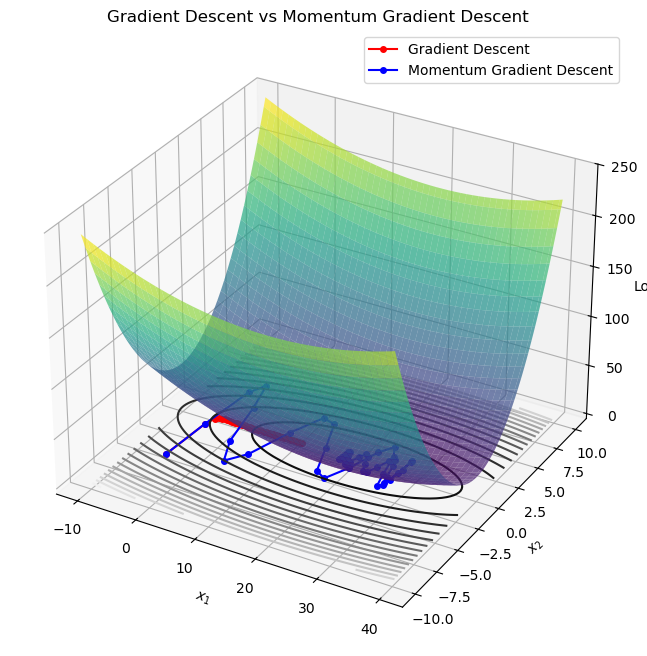

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the loss function f(x1, x2) = (x1 - 10)^2 / 20 + x2^2
def loss_function(x):
    return (x[0] - 20) ** 2 / 20 + 2 * x[1] ** 2

# Gradient of the loss function
def compute_gradient(x):
    grad_x1 = 2 * (x[0] - 20) / 20
    grad_x2 = 2 * 2 * x[1] ** 1
    return torch.tensor([grad_x1, grad_x2])

# Optimization settings
learning_rate = 0.2
momentum = 0.9
iterations = 50

# Initial point (starting from a far-off place)
x_gd = torch.tensor([-5.0, -5.0])
x_gdm = torch.tensor([-5.0, -5.0])

# Lists to store trajectory for plotting
gd_trajectory = [x_gd.detach().numpy()]
gdm_trajectory = [x_gdm.detach().numpy()]

# Momentum velocity term
velocity = torch.tensor([0.0, 0.0])

# Perform optimization
for _ in range(iterations):
    # Compute gradients
    grad_gd = compute_gradient(x_gd)
    grad_gdm = compute_gradient(x_gdm)

    # Normal Gradient Descent Update
    x_gd = x_gd - learning_rate * grad_gd
    gd_trajectory.append(x_gd.numpy())

    # Gradient Descent with Momentum Update
    velocity = momentum * velocity - learning_rate * grad_gdm
    x_gdm = x_gdm + velocity
    gdm_trajectory.append(x_gdm.numpy())
    
    
# Convert trajectories to NumPy for plotting
gd_trajectory = np.array(gd_trajectory)
gdm_trajectory = np.array(gdm_trajectory)

# Create a meshgrid for 3D surface plot
x1_vals = np.linspace(-10, 40, 100)
x2_vals = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = loss_function([X1,X2])

# Plot the function surface and optimization paths
fig = plt.figure(figsize=(12, 8))

# 3D surface plot
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)

# Plot GD trajectory
ax.plot(gd_trajectory[:, 0], gd_trajectory[:, 1], color='red', marker='o', markersize=4, label='Gradient Descent')

# Plot GDM trajectory
ax.plot(gdm_trajectory[:, 0], gdm_trajectory[:, 1], color='blue', marker='o', markersize=4, label='Momentum Gradient Descent')

# Labels and legend
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent vs Momentum Gradient Descent')
ax.legend()

# 2D Contour plot projection
ax.contour(X1, X2, Z, levels=20, cmap='gray', zdir='z', offset=np.min(Z))

plt.show()

Animation saved as ./img/gradient_vs_momentum.gif


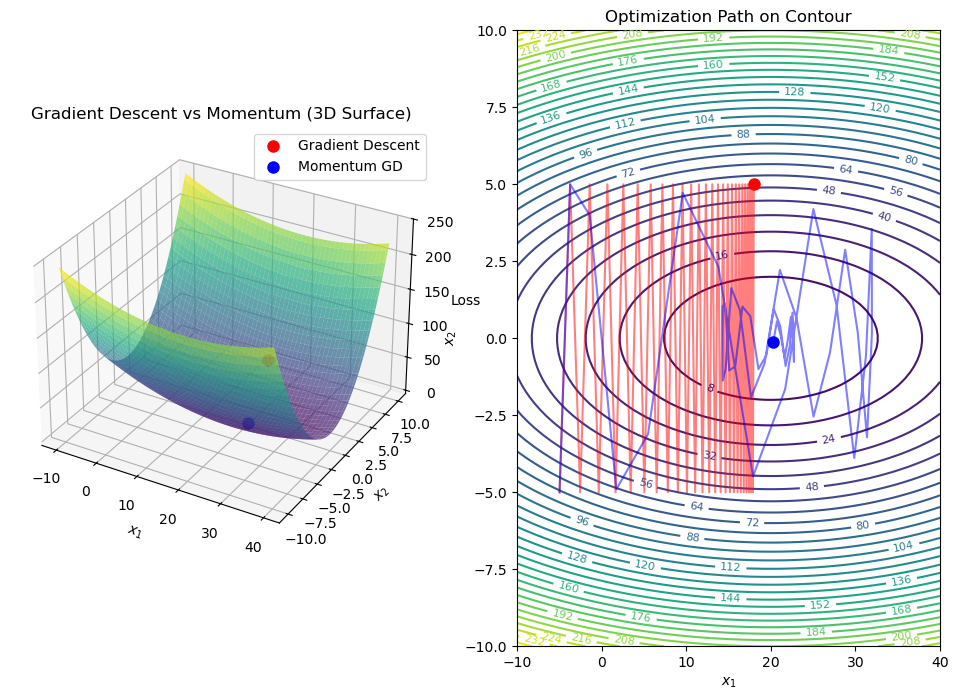

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Define the loss function f(x1, x2) = (x1 - 20)^2 / 20 + 2 * x2^2
def loss_function(x):
    return (x[0] - 20) ** 2 / 20 + 2 * x[1] ** 2

# Gradient of the loss function
def compute_gradient(x):
    grad_x1 = 2 * (x[0] - 20) / 20
    grad_x2 = 2 * 2 * x[1]
    return torch.tensor([grad_x1, grad_x2])

# Optimization settings
learning_rate = 0.5
momentum = 0.9
iterations = 50

# Initial points
x_gd = torch.tensor([-5.0, -5.0])
x_gdm = torch.tensor([-5.0, -5.0])

# Lists to store trajectory for plotting
gd_trajectory = [x_gd.numpy()]
gdm_trajectory = [x_gdm.numpy()]

# Momentum velocity term
velocity = torch.tensor([0.0, 0.0])

# Perform optimization
for _ in range(iterations):
    grad_gd = compute_gradient(x_gd)
    grad_gdm = compute_gradient(x_gdm)

    # Normal Gradient Descent Update
    x_gd = x_gd - learning_rate * grad_gd
    gd_trajectory.append(x_gd.numpy())

    # Gradient Descent with Momentum Update
    velocity = momentum * velocity - learning_rate * grad_gdm
    x_gdm = x_gdm + velocity
    gdm_trajectory.append(x_gdm.numpy())

# Convert trajectories to NumPy for plotting
gd_trajectory = np.array(gd_trajectory)
gdm_trajectory = np.array(gdm_trajectory)

# Create meshgrid for surface and contour plots
x1_vals = np.linspace(-10, 40, 100)
x2_vals = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = loss_function([X1, X2])

# Create figure and subplots
fig = plt.figure(figsize=(12, 8))

# 3D surface plot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)

# 2D contour plot
ax2d = fig.add_subplot(122)
contour = ax2d.contour(X1, X2, Z, levels=30, cmap='viridis')
ax2d.clabel(contour, inline=True, fontsize=8)

# Initialize points for animation
gd_point_3d, = ax3d.plot([], [], [], 'ro', markersize=8, label="Gradient Descent")
gdm_point_3d, = ax3d.plot([], [], [], 'bo', markersize=8, label="Momentum GD")

gd_point_2d, = ax2d.plot([], [], 'ro', markersize=8)
gdm_point_2d, = ax2d.plot([], [], 'bo', markersize=8)

# Plot initial trajectories
gd_traj_2d, = ax2d.plot([], [], 'r-', alpha=0.5)
gdm_traj_2d, = ax2d.plot([], [], 'b-', alpha=0.5)

# Labels and legends
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('Loss')
ax3d.set_title('Gradient Descent vs Momentum (3D Surface)')
ax3d.legend()

ax2d.set_xlabel('$x_1$')
ax2d.set_ylabel('$x_2$')
ax2d.set_title('Optimization Path on Contour')

def update(frame):
    if frame < len(gd_trajectory):
        # Update ball positions (must pass lists or arrays, not scalars)
        gd_point_3d.set_data([gd_trajectory[frame, 0]], [gd_trajectory[frame, 1]])
        gd_point_3d.set_3d_properties([loss_function(gd_trajectory[frame])])

        gdm_point_3d.set_data([gdm_trajectory[frame, 0]], [gdm_trajectory[frame, 1]])
        gdm_point_3d.set_3d_properties([loss_function(gdm_trajectory[frame])])

        gd_point_2d.set_data([gd_trajectory[frame, 0]], [gd_trajectory[frame, 1]])
        gdm_point_2d.set_data([gdm_trajectory[frame, 0]], [gdm_trajectory[frame, 1]])

        # Update trajectory lines on contour plot
        gd_traj_2d.set_data(gd_trajectory[:frame+1, 0], gd_trajectory[:frame+1, 1])
        gdm_traj_2d.set_data(gdm_trajectory[:frame+1, 0], gdm_trajectory[:frame+1, 1])

    return gd_point_3d, gdm_point_3d, gd_point_2d, gdm_point_2d, gd_traj_2d, gdm_traj_2d

# Create and save animation
ani = animation.FuncAnimation(fig, update, frames=iterations, interval=150, blit=True)

# Save the animation as a GIF file
gif_filename = "./img/gradient_vs_momentum.gif"
ani.save(gif_filename, writer=animation.PillowWriter(fps=10))

print(f"Animation saved as {gif_filename}")



## That's it for today

We'll discuss linear regression next time

## Other References: 
 
[1] Dimitrios Katselis "Lecture 3: Steepest and Gradient Descent-Part I" [link](https://katselis.web.engr.illinois.edu/ECE586/Lecture3.pdf)

[2] Lewis Mitchell, "Gradient descent: steepest descent" [video](https://www.youtube.com/watch?v=8hau2T9bghA)

[3] Visually Explained, "Accelerate Gradient Descent with Momentum" [video](https://www.youtube.com/watch?v=iudXf5n_3ro&t=60s)